In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_recall_fscore_support as prfs
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
# Loading dataset
df = pd.read_csv('LetterRecognition.csv', header=0)

In [3]:
# Data Types
print(df.info())

# Head
df.head()

# Showing columns in dataset
print(df.columns)

# Showing instances in dataset
len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1    x-box  20000 non-null  int64 
 2    y-box  20000 non-null  int64 
 3    width  20000 non-null  int64 
 4    high   20000 non-null  int64 
 5    onpix  20000 non-null  int64 
 6    x-bar  20000 non-null  int64 
 7    y-bar  20000 non-null  int64 
 8    x2bar  20000 non-null  int64 
 9    y2bar  20000 non-null  int64 
 10   xybar  20000 non-null  int64 
 11   x2ybr  20000 non-null  int64 
 12   xy2br  20000 non-null  int64 
 13   x-ege  20000 non-null  int64 
 14   xegvy  20000 non-null  int64 
 15   y-ege  20000 non-null  int64 
 16   yegvx  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None
Index(['letter', ' x-box', ' y-box', ' width', ' high', ' onpix', ' x-bar',
       ' y-bar', ' x2bar', ' y2bar', ' xybar', ' x2ybr', ' xy2br', ' x-ege'

20000

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


<AxesSubplot:xlabel='letter', ylabel='xbox'>

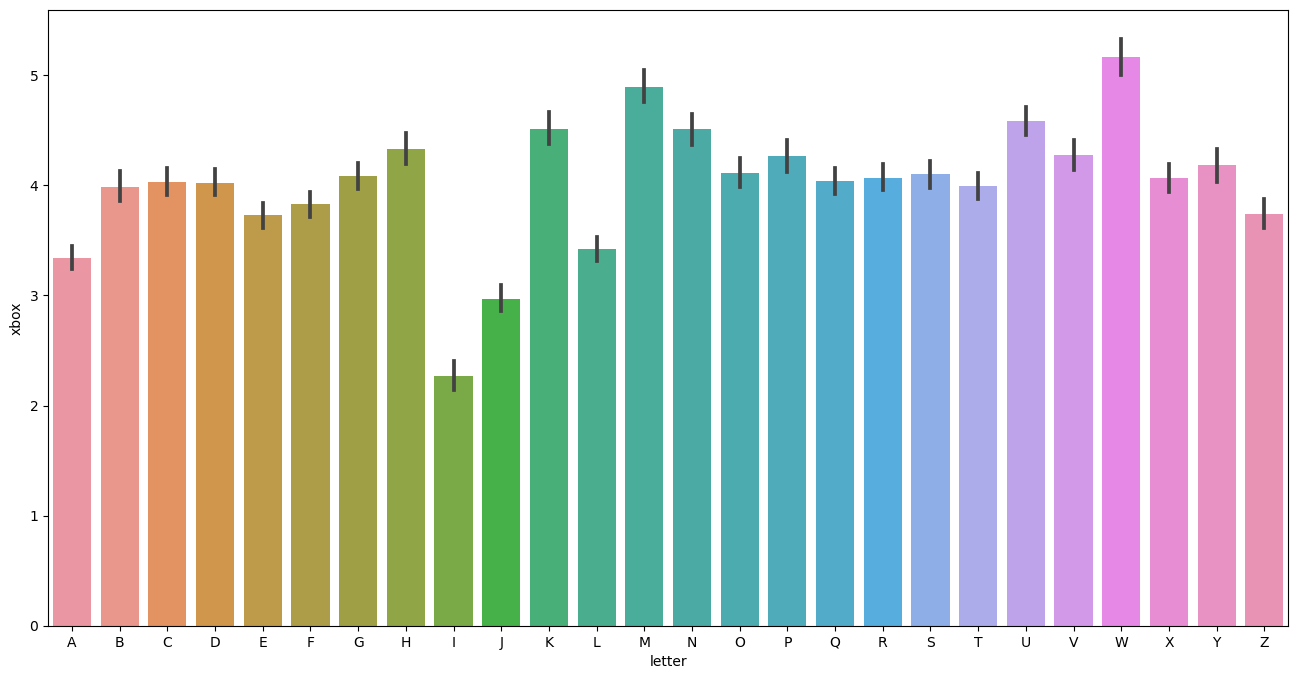

In [4]:
# Reindexing the column names
df.columns = ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar',
       'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge',
       'xedgey', 'yedge', 'yedgex']
print(df.columns)
order = list(np.sort(df['letter'].unique()))
print(order)

# Plot to show how various attributes changes with the letters
plt.figure(figsize=(16, 8))
sns.barplot(x='letter', y='xbox', 
            data=df, 
            order=order)

In [5]:
# Calculating average feature values
round(df.drop('letter', axis=1).mean(), 2)

xbox      4.02
ybox      7.04
width     5.12
height    5.37
onpix     3.51
xbar      6.90
ybar      7.50
x2bar     4.63
y2bar     5.18
xybar     8.28
x2ybar    6.45
xy2bar    7.93
xedge     3.05
xedgey    8.34
yedge     3.69
yedgex    7.80
dtype: float64

Although average values are not very different, scaling them can still be beneficial.

In [6]:
# Splitting dataset into feature and target variable (X and y)
X = df.drop("letter", axis = 1)
y = df['letter']

# Scaling features
X_scaled = scale(X)

# Splitting dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)

## 1. K-Nearest Neighbor Classification (KNN)

In [8]:
# Creating and Training the KNN Classifier
knn_clsfr = KNeighborsClassifier(n_neighbors=10)
knn_clsfr.fit(X_train, y_train.values.ravel())

# Testing accuracy of KNN algorithm
acc = accuracy_score(y_test,knn_clsfr.predict(X_test))
print('Accuracy score for KNN Algorithm: ', acc*100,'%')

# Precision, Recall and F1-score on test split
prec, rec, f, s = prfs(y_test,knn_clsfr.predict(X_test), average="micro")
print(prec, rec, f)
print(classification_report(y_test, knn_clsfr.predict(X_test)))

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy score for KNN Algorithm:  93.47999999999999 %


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9348 0.9348 0.9348


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           A       0.98      0.98      0.98       199
           B       0.89      0.97      0.93       211
           C       0.96      0.94      0.95       182
           D       0.86      0.96      0.91       198
           E       0.90      0.92      0.91       191
           F       0.92      0.92      0.92       215
           G       0.91      0.92      0.91       169
           H       0.84      0.85      0.85       171
           I       0.94      0.96      0.95       189
           J       0.95      0.91      0.93       186
           K       0.88      0.84      0.86       195
           L       0.95      0.96      0.96       194
           M       0.95      0.95      0.95       190
           N       0.96      0.93      0.95       199
           O       0.88      0.96      0.92       169
           P       0.92      0.89      0.91       190
           Q       0.96      0.91      0.94       187
           R       0.91    

## 2. Decision Tree Classification

In [9]:
# Creating and Training the Decision Tree Classifier
dt_clsfr = DecisionTreeClassifier(random_state=0)
dt_clsfr.fit(X_train, y_train.values.ravel())

# Testing accuracy of Decision Trees Algorithm
acc = accuracy_score(y_test, dt_clsfr.predict(X_test))
print('Accuracy score for Decision Trees Algorithm: ', acc*100,'%')

# Precision, Recall and F1-score on test split
prec, rec, f, s = prfs(y_test, dt_clsfr.predict(X_test), average="micro")
print(prec, rec, f)
print(classification_report(y_test, dt_clsfr.predict(X_test)))

Accuracy score for Decision Trees Algorithm:  86.6 %
0.866 0.866 0.866
              precision    recall  f1-score   support

           A       0.93      0.94      0.94       199
           B       0.77      0.82      0.79       211
           C       0.90      0.86      0.88       182
           D       0.84      0.79      0.81       198
           E       0.84      0.83      0.83       191
           F       0.85      0.81      0.83       215
           G       0.81      0.79      0.80       169
           H       0.75      0.77      0.76       171
           I       0.92      0.92      0.92       189
           J       0.88      0.89      0.89       186
           K       0.83      0.82      0.82       195
           L       0.90      0.88      0.89       194
           M       0.89      0.93      0.91       190
           N       0.87      0.89      0.88       199
           O       0.78      0.85      0.82       169
           P       0.87      0.88      0.87       190
          

## 3. Support Vector Classification (SVM)

### Linear model

In [11]:
# Creating and Training the Support Vector Classifier
sv_clsfr = SVC(kernel='linear')
sv_clsfr.fit(X_train, y_train)

# Testing accuracy of SVM Algorithm
acc = accuracy_score(y_test, sv_clsfr.predict(X_test))
print('Accuracy score for Support Vector: ', acc*100,'%')

# Precision, Recall and F1-score on test split
prec, rec, f, s = prfs(y_test, sv_clsfr.predict(X_test), average="micro")
print(prec, rec, f)

# Confusion matrix and classification report
print(confusion_matrix(y_test, sv_clsfr.predict(X_test)))
print(classification_report(y_test, sv_clsfr.predict(X_test)))

Accuracy score for Support Vector:  84.82 %
0.8482 0.8482 0.8482
[[189   1   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   2
    1   0   2   0   0   0   3   0]
 [  1 185   0   1   1   0   5   7   0   0   1   0   0   1   0   1   0   8
    0   0   0   0   0   0   0   0]
 [  0   0 153   0   5   0   4   1   0   0  16   0   0   0   2   0   0   0
    0   0   1   0   0   0   0   0]
 [  2   8   0 178   0   0   0   2   0   0   0   0   0   3   2   1   0   0
    0   0   2   0   0   0   0   0]
 [  0   4   2   0 167   1   6   0   0   0   1   2   0   0   0   0   2   1
    3   2   0   0   0   0   0   0]
 [  0   1   0   1   3 187   2   0   0   3   0   0   0   2   0   5   0   0
    5   5   0   0   0   0   0   1]
 [  1   1   6   5   1   1 122   4   0   0   4   6   0   0   3   0   4   4
    3   0   0   2   2   0   0   0]
 [  0   4   3  14   0   2   1 112   0   0   5   0   0   2   9   1   1  11
    0   0   2   0   0   3   1   0]
 [  0   1   2   5   1   3   0   0 162   5   0   0   0   0   1  

We get 85% accuracy using the linear model, which is very low. We now implement non-linear model to check the accuracy.

### Non-linear model

In [12]:
# Creating and Training the Non-Linear model
sv_clsfr_nl = SVC(kernel='rbf')
sv_clsfr_nl.fit(X_train, y_train.values.ravel())

# Testing accuracy of SVM Algorithm
acc = accuracy_score(y_test, sv_clsfr_nl.predict(X_test))
print('Accuracy score for Support Vector (Non-Linear Model): ', acc*100,'%')

# Precision, Recall and F1-score on test split
prec, rec, f, s = prfs(y_test, sv_clsfr_nl.predict(X_test), average="micro")
print(prec, rec, f)

# Confusion matrix and classification report
print(confusion_matrix(y_test, sv_clsfr_nl.predict(X_test)))
print(classification_report(y_test, sv_clsfr_nl.predict(X_test)))

Accuracy score for Support Vector (Non-Linear Model):  93.89999999999999 %
0.939 0.939 0.939
[[193   0   1   1   0   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   3   0]
 [  1 196   0   3   1   0   0   2   0   0   0   0   0   0   0   0   0   6
    2   0   0   0   0   0   0   0]
 [  0   0 166   0   4   0   5   0   0   0   1   0   0   0   2   0   0   4
    0   0   0   0   0   0   0   0]
 [  0   1   0 188   0   0   0   2   0   0   0   0   0   4   2   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   2   1   0 182   0   3   0   0   0   1   0   0   0   0   0   0   1
    0   0   0   0   0   0   0   1]
 [  0   2   0   1   2 205   0   1   0   0   0   0   0   0   0   3   0   0
    1   0   0   0   0   0   0   0]
 [  0   1   1   3   0   0 158   0   0   0   0   0   0   0   3   0   0   2
    0   0   0   0   1   0   0   0]
 [  0   5   0   7   0   0   3 143   0   0   0   0   0   0   2   0   1   9
    0   0   0   0   0   0   1   0]
 [  0   0   1   0   0   3   0   0 1

We get 93.9% accuracy by the non-linear model. So now, performing Hyperparameter Tuning to find the optimal values of C and gamma with 10-fold cross validation.

In [13]:
# Creating KFold
fold = KFold(n_splits = 10, shuffle = True, random_state = 101)

# Setting model and parameters
model = SVC(kernel="rbf")
hyper_param = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

# Setting GridSearchCV()
cv_model = GridSearchCV(estimator = model, 
                        param_grid = hyper_param, 
                        scoring= 'accuracy', 
                        cv = fold, 
                        verbose = 1,
                        return_train_score=True)      

# Fitting model
cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [14]:
# Viewing result
cv_result = pd.DataFrame(cv_model.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,5.488967,1.689217,2.802145,1.028310,1,0.01,"{'C': 1, 'gamma': 0.01}",0.847333,0.858667,0.849333,...,0.858148,0.856519,0.856444,0.855333,0.855704,0.855630,0.854889,0.854741,0.856007,0.001219
1,8.746239,0.079456,2.807985,0.070434,1,0.001,"{'C': 1, 'gamma': 0.001}",0.682000,0.704667,0.696667,...,0.704296,0.706593,0.705481,0.705259,0.703259,0.708667,0.708815,0.706444,0.706126,0.002213
2,21.313119,1.971318,3.686254,0.375220,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.268667,0.262667,0.246000,...,0.271185,0.294667,0.278815,0.296815,0.298667,0.308741,0.263333,0.269778,0.284985,0.015059
3,2.944722,0.257455,1.771480,0.162546,10,0.01,"{'C': 10, 'gamma': 0.01}",0.919333,0.922000,0.915333,...,0.929778,0.933185,0.932963,0.931111,0.931333,0.930519,0.930593,0.932444,0.931281,0.001138
4,5.257276,0.364394,2.906497,0.139705,10,0.001,"{'C': 10, 'gamma': 0.001}",0.817333,0.838000,0.820000,...,0.830148,0.828667,0.830741,0.829556,0.829852,0.829630,0.830222,0.829481,0.829785,0.000525
5,11.957966,0.407624,3.968754,0.328868,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.681333,0.706667,0.694667,...,0.703481,0.705852,0.706593,0.705704,0.703407,0.708593,0.708815,0.706444,0.706007,0.002246
6,3.438912,0.222559,1.439506,0.115562,100,0.01,"{'C': 100, 'gamma': 0.01}",0.948667,0.960667,0.942667,...,0.978963,0.979259,0.977630,0.979407,0.979185,0.978593,0.978148,0.978370,0.978667,0.000593
7,3.708575,0.718886,1.931790,0.259374,100,0.001,"{'C': 100, 'gamma': 0.001}",0.863333,0.881333,0.862667,...,0.883333,0.881111,0.883556,0.880593,0.881111,0.879704,0.883407,0.880815,0.881437,0.001377
8,4.669037,0.361124,2.759688,0.274534,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.809333,0.831333,0.812667,...,0.825185,0.824667,0.824370,0.820815,0.823259,0.823852,0.824519,0.824741,0.824015,0.001182
9,2.750088,0.028210,0.927482,0.008614,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.953333,0.966667,0.944000,...,0.997037,0.996741,0.996593,0.996815,0.996815,0.996519,0.996963,0.996667,0.996770,0.000235


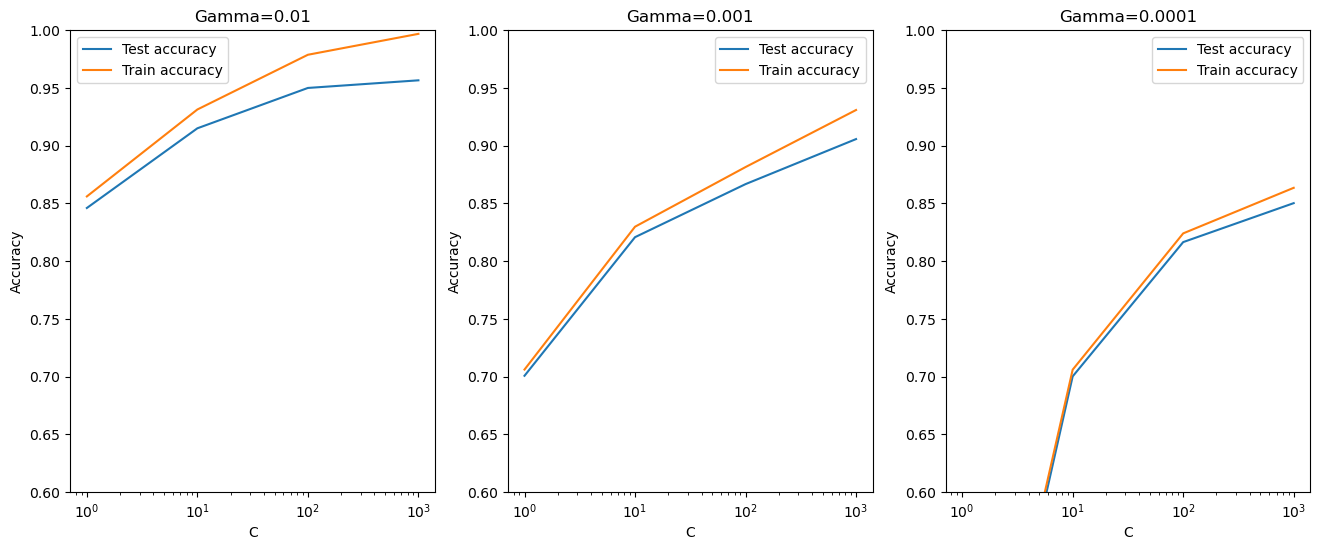

In [15]:
# Plotting results

# Converting C to numeric type for plotting
cv_result['param_C'] = cv_result['param_C'].astype('int')

plt.figure(figsize=(16,6))

# Plot 1
plt.subplot(131)
gamma_01 = cv_result[cv_result['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['Test accuracy', 'Train accuracy'])
plt.xscale('log')

# Plot 2
plt.subplot(132)
gamma_001 = cv_result[cv_result['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['Test accuracy', 'Train accuracy'])
plt.xscale('log')

# Plot 3
plt.subplot(133)
gamma_0001 = cv_result[cv_result['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['Test accuracy', 'Train accuracy'])
plt.xscale('log')

In [16]:
# Calculating optimal accuracy score and hyperparameters
best_score = cv_model.best_score_
best_hyperparam = cv_model.best_params_
print("Best test score is {0} with hyperparameters {1}".format(best_score, best_hyperparam))

Best test score is 0.9565333333333333 with hyperparameters {'C': 1000, 'gamma': 0.01}


Building and Evaluating the Final Model with highest test accuracy.

In [18]:
# Creating and Training the Support Vector Classifier
sv_model = SVC(C=1000, gamma=0.01, kernel="rbf")
sv_model.fit(X_train, y_train)

# Testing accuracy of Support Vector algorithm
acc = accuracy_score(y_test,sv_model.predict(X_test))
print('Accuracy score for Support Vector Algorithm(Non-Linear model) after hyperparmeter tuning: ', acc*100,'%')

# Precision, Recall and F1-score on test split
prec, rec, f, s = prfs(y_test,sv_model.predict(X_test), average="micro")
print(prec, rec, f)
print(classification_report(y_test, sv_model.predict(X_test)))

Accuracy score for Support Vector Algorithm(Non-Linear model) after hyperparmeter tuning:  95.74000000000001 %
0.9574 0.9574 0.9574
              precision    recall  f1-score   support

           A       0.99      0.99      0.99       199
           B       0.94      0.95      0.94       211
           C       0.96      0.96      0.96       182
           D       0.91      0.96      0.94       198
           E       0.93      0.95      0.94       191
           F       0.92      0.97      0.94       215
           G       0.94      0.95      0.94       169
           H       0.91      0.92      0.91       171
           I       0.97      0.97      0.97       189
           J       0.98      0.95      0.96       186
           K       0.92      0.95      0.93       195
           L       0.99      0.96      0.98       194
           M       0.97      0.98      0.97       190
           N       0.95      0.95      0.95       199
           O       0.94      0.96      0.95       169
   